In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers, layers

### 1. 准备数据

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
print(housing.data[0:5])
print(housing.target[0:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


**数据分割**

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


**归一化**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

### 2. 模型构建

In [6]:
x_train.shape[1:]

(8,)

In [7]:
model = Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])
model.build(input_shape=(None, 8))
model.summary()
model.compile(loss="mean_squared_error", optimizers="sgd")
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2)
]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  900       
_________________________________________________________________
dense_1 (Dense)              multiple                  101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train_scaled, y_train, 
                    validation_data=(x_valid_scaled, y_valid),
                   epochs=20, callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 132us/sample - loss: 1.0030 - val_loss: 0.5671
Epoch 2/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.8156 - val_loss: 0.5250
Epoch 3/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6809 - val_loss: 0.4856
Epoch 4/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5126 - val_loss: 0.4124
Epoch 5/20
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4124 - val_loss: 0.3863
Epoch 6/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3683 - val_loss: 0.3670
Epoch 7/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3519 - val_loss: 0.3673
Epoch 8/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3576 - val_loss: 0.3519
Epoch 9/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3743 - val_

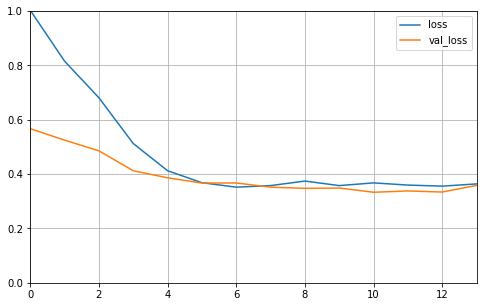

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=2)

5160/1 - 0s - loss: 0.5717


0.5428190447563349

### 3. 使用自定义损失函数

In [11]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

model2 = Sequential([
    layers.Dense(30, activation='relu'),
    layers.Dense(1)
])
model2.build(input_shape=(None, 8))
model2.summary()
model2.compile(loss=customized_mse, optimizers="sgd", metrics=["mean_squared_error"])
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2)
]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  270       
_________________________________________________________________
dense_3 (Dense)              multiple                  31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model2.fit(x_train_scaled, y_train, epochs=10,
           validation_data=(x_valid_scaled, y_valid),
           callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 106us/sample - loss: 1.9073 - mean_squared_error: 1.9073 - val_loss: 0.6610 - val_mean_squared_error: 0.6610
Epoch 2/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.8919 - mean_squared_error: 0.8919 - val_loss: 0.5952 - val_mean_squared_error: 0.5952
Epoch 3/10
11610/11610 [==============================] - 1s 68us/sample - loss: 0.7845 - mean_squared_error: 0.7845 - val_loss: 0.5651 - val_mean_squared_error: 0.5651
Epoch 4/10
11610/11610 [==============================] - 1s 78us/sample - loss: 0.7212 - mean_squared_error: 0.7212 - val_loss: 0.5198 - val_mean_squared_error: 0.5198
Epoch 5/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6597 - mean_squared_error: 0.6597 - val_loss: 0.4905 - val_mean_squared_error: 0.4905
Epoch 6/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6002 - mean_squared_er

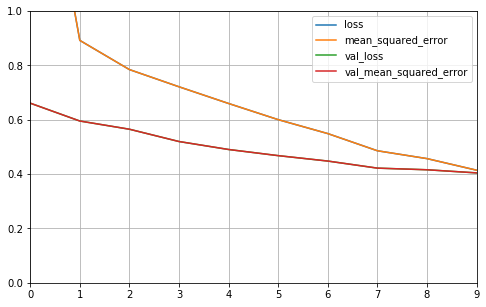

In [13]:
plot_learning_curves(history)

In [14]:
model2.evaluate(x_test_scaled, y_test, verbose=2)

5160/1 - 0s - loss: 0.6031 - mean_squared_error: 0.5758


[0.5758188431577165, 0.575819]

### 4. 自定义 layer

In [15]:
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数"""
        self.kernel = self.add_weight(name = "kernel", 
                                     shape = (input_shape[1], self.units),
                                     initializer = "uniform",
                                     trainable = True)
        self.bias = self.add_weight(name = "bias", shape = (self.units, ),
                                    initializer = 'zeros',
                                   trainable = True)
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        return self.activation(x @ self.kernel + self.bias)

model3 = Sequential([
    CustomizedDenseLayer(30, activation='relu', 
                         input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
#     customized_softplus,
#     keras.layers.Dense(1, activation="softplus")
#     keras.layers.Dense(1, keras.layers.Activation('softplus'))
])
# model3.build(input_shape=(None, 8))
model3.summary()
model3.compile(loss="mean_squared_error", optimizers="sgd")
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2)
]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer (Cust (None, 30)                270       
_________________________________________________________________
customized_dense_layer_1 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model3.fit(x_train_scaled, y_train, epochs=50,
           validation_data=(x_valid_scaled, y_valid),
           callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 119us/sample - loss: 1.9919 - val_loss: 0.6503
Epoch 2/50
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5039 - val_loss: 0.4759
Epoch 3/50
11610/11610 [==============================] - 1s 115us/sample - loss: 0.4383 - val_loss: 0.4428
Epoch 4/50
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4216 - val_loss: 0.4296
Epoch 5/50
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4091 - val_loss: 0.4265
Epoch 6/50
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4038 - val_loss: 0.4180
Epoch 7/50
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3974 - val_loss: 0.4114
Epoch 8/50
11610/11610 [==============================] - 1s 100us/sample - loss: 0.3931 - val_loss: 0.4091
Epoch 9/50
11610/11610 [==============================] - 1s 115us/sample - loss: 0.3895 - v

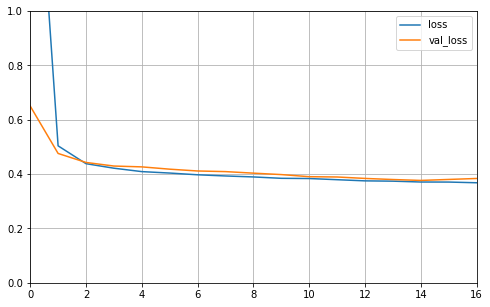

In [17]:
plot_learning_curves(history)

In [18]:
model3.evaluate(x_test_scaled, y_test, verbose=2)

5160/1 - 0s - loss: 0.5258


0.3995882928371429

### 5. 自定义梯度求导

In [22]:
# 1. batch 遍历训练集 metrics
# 2. 自动求导
# 3. epoch 结束， 验证集 metrics
epochs = 50
batch_size = 32
steps_per_epoch = len(x_train_scaled) // batch_size

optimizer = keras.optimizers.SGD()
metric = keras.metrics.MeanSquaredError()

def random_batch(x, y, batch_size=32):
    idx = np.random.randint(0, len(x), size=batch_size)
    return x[idx], y[idx]

model4 = Sequential([
    layers.Dense(100, activation='relu', input_shape=x_train.shape[1:]),
    layers.Dense(1)
])

for epoch in range(epochs):
    metric.reset_states()
    for step in range(steps_per_epoch):
        x_batch, y_batch = random_batch(x_train_scaled, y_train, batch_size)
        with tf.GradientTape() as tape:
            y_pred = model4(x_batch)
            y_pred = tf.squeeze(y_pred, 1)
            loss = keras.losses.mean_squared_error(y_batch, y_pred)
            metric(y_batch, y_pred)
        grads = tape.gradient(loss, model4.variables)
        optimizer.apply_gradients(zip(grads, model4.variables))
        print("\rEpoch", epoch, " train mse:", metric.result().numpy(), end="")
    # 验证 metric
    y_valid_pred = model4(x_valid_scaled)
    y_valid_pred = tf.squeeze(y_valid_pred, 1)
    valid_loss = keras.losses.mean_squared_error(y_valid, y_valid_pred)
    print("\t", "valid mse: ", valid_loss.numpy())